# Getting Started

## Installation

For installing cleanvision, you will have to first clone the repo and then install from source.
Steps for installing from cloned repo
```bash
git clone https://github.com/cleanlab/cleanvision.git
cd cleanvision
pip install .
```
We plan to upload it on pypi soon!

## What is CleanVision?
**CleanVision** is built to automatically detects various issues in image datasets, such as images that are: (near) duplicates, blurry, over/under-exposed, etc. This data-centric AI package is designed as a quick first step for any computer vision project to find problems in your dataset, which you may want to address before applying machine learning

`cleanvision` provides a class **Imagelab** that you can use to find issues in your dataset, get a detailed summary of the issues found and also visualize them. It is a clean, effective and easy to understand interface that can be used for detailed investigation of issues in your dataset.

The easiest way to use Imagelab class is to run it for a set of default predefined issue types. Here is the list of all issue types that cleanvision can detect.

|     | Issue Type      | Description                                                                                  | Issue Key        |
|-----|------------------|----------------------------------------------------------------------------------------------|------------------|
| 1   | Light            | Images that are too bright/washed out in the dataset                                         | light            |
| 2   | Dark             | Images that are irregularly dark                                                             | dark             |
| 3   | Odd Aspect Ratio | Images with an unusual aspect ratio (i.e. overly skinny/wide)                                                       | odd_aspect_ratio |
| 4   | Exact Duplicates | Images that are exact duplicates of each other                          | exact_duplicates |
| 5   | Near Duplicates  | Images that are almost visually identical to each other                                 | near_duplicates  |
| 6   | Blurry           | Images that are blurry or out of focus                                                  | blurry           |
| 7   | Grayscale        | Images that are grayscale (lacking color)                                                            | grayscale        |
| 8   | Low Information  | Images that lack much information (e.g. a completely black image with a few white dots) | low_information  |

The Issue Key column specifies the name for each type of issue in the CleanVision code. In the examples, it is shown how one can use these keys to detect particular issue types and specify custom hyperparameters.

This notebook uses an example dataset, that you can download from here.
```bash
wget - nc 'https://cleanlab-public.s3.amazonaws.com/CleanVision/image_files.zip'
unzip image_files.zip
```

## Examples

### Using Imagelab to detect default issue types

Reading images from /Users/sanjana/cleanlab_home/cleanvision/image_files


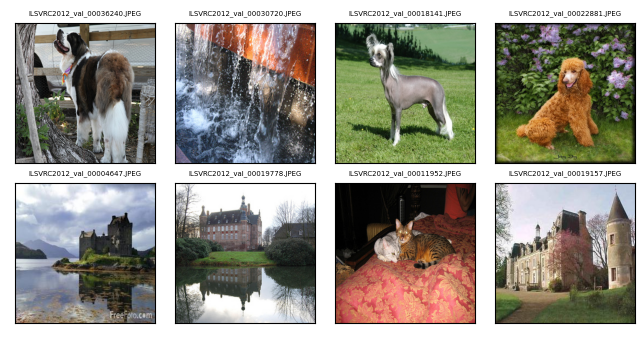

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:04<00:00, 128.43it/s]


In [1]:
from cleanvision.imagelab import Imagelab

# Path to your dataset, you can specify your own dataset path
dataset_path = "../image_files"

# Initialize imagelab with your dataset
imagelab = Imagelab(dataset_path)

# Visualize a few images from the dataset
imagelab.visualize(num_images=8)

# Find issues
imagelab.find_issues()

To have a look at the issues found in the dataset dataset use `imagelab.report()` as shown below. It reports the top issues found in the dataset, `num_images` found in the dataset for each issue type,  as well as some examples found.

Top issues in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | dark         |           27 |
|  1 | blurry       |           12 |
|  2 | grayscale    |           12 | 


Top 4 images with dark issue


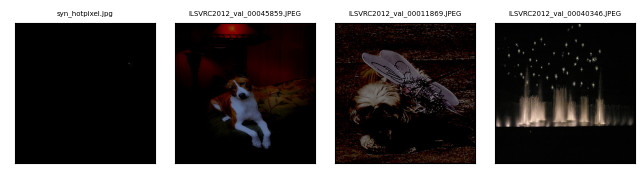


Top 4 images with blurry issue


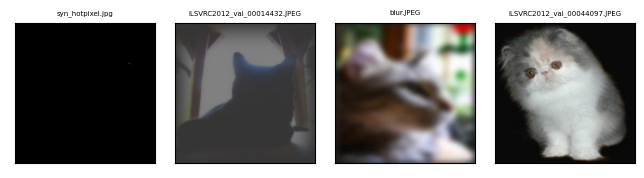


Top 4 images with grayscale issue


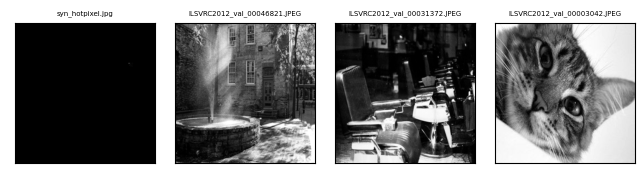

In [2]:
imagelab.report()

You can dive deep into the analysis by further looking at following imagelab attributes
- `imagelab.issue_summary`
- `imagelab.issues`
- `imagelab.info`

#### imagelab.issue_summary
Dataframe that contains summary of all issue types detected

In each row:\
`issue_type` - name of the issue\
`num_images` - number of images of that issue type found in the dataset\
`num_sets` - applicable in case of issues like exact duplicates and near duplicates, shows the number of sets of duplicate images found in the dataset

In [3]:
imagelab.issue_summary

issue_type  num_images  num_sets
0              dark        27.0       NaN
1            blurry        12.0       NaN
2         grayscale        12.0       NaN
3  exact_duplicates         7.0       3.0
4             light         4.0       NaN
5  odd_aspect_ratio         3.0       NaN
6   near_duplicates         2.0       1.0
7   low_information         1.0       NaN

#### imagelab.issues

This is a dataframe that list scores of all issue type for all images in the dataset. It also has a bool column showing whether that particular image is an issue or not.
For example `dark_score` is the score for issue type dark. Here all scores lie between 0 and 1, where lower values indicate higher probability that there is an issue in the image. A very obvious use case for`imagelab.issues` is to filter out all images with say `odd_aspect_ratio` issue type

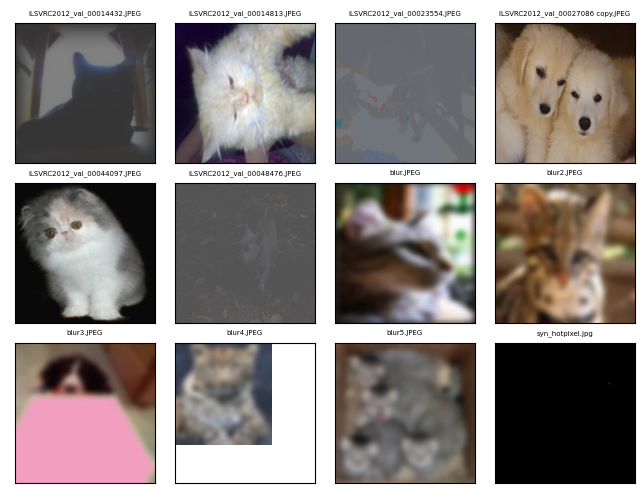

In [5]:
# Get all images with blurry issue type
blurry_images = imagelab.issues[imagelab.issues["blurry_bool"] == True].index.to_list()

imagelab.visualize(image_files=blurry_images)  # visualize the given image files

#### imagelab.info

This is a nested dictionary that contains statistics on images or other useful information that was collected while checking for issues in the dataset.

In [6]:
# Possible keys: statistics, issue keys
print(list(imagelab.info.keys()), "\n")

['statistics', 'exact_duplicates', 'near_duplicates'] 



In [7]:
# statistics collected, you can further look into these by checking their values
print(list(imagelab.info['statistics'].keys()))
imagelab.info['statistics']['brightness'][:10]

['aspect_ratio', 'blurriness', 'entropy', 'color_space', 'brightness']


[0.4947914848241874,
 0.5323015790251622,
 0.5329535292079364,
 0.4833209171432426,
 0.5115870365350751,
 0.4641794369371005,
 0.5055116748825899,
 0.40519297933673853,
 0.31253668437132126,
 0.370198806081395]

### Using Imagelab to detect specific issues

It might be the case that only a few issue types are relevant for your dataset and you don't want to run it through all checks to save time. You can do so by specifying `issue_types` as an argument.

`issue_types` is a dict, where keys are the issue types that you want to detect and values are dict which contains hyperparameters. For now we are using default hyperparameters. You can find keys in the above table that lists all issue types supported by cleanvision. 

Reading images from /Users/sanjana/cleanlab_home/cleanvision/image_files
Checking for exact_duplicates images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:01<00:00, 324.60it/s]


Top issues in the dataset

|    | issue_type       |   num_images |   num_sets |
|---:|:-----------------|-------------:|-----------:|
|  0 | exact_duplicates |            7 |          3 | 

Found 3 sets of images with exact_duplicates issue in the dataset.


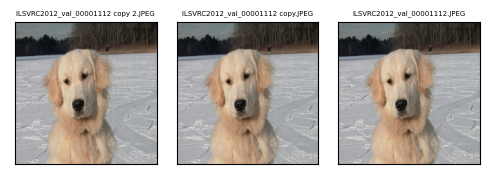

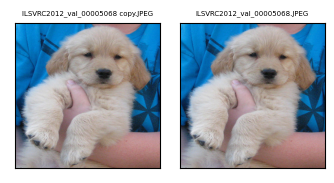

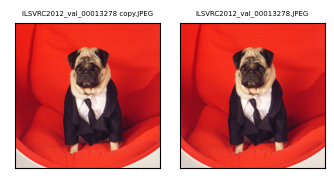

In [8]:
# Initialize imagelab with your dataset
imagelab = Imagelab(dataset_path)

# specify issue types to detect
issue_types = {"exact_duplicates": {}}

# Find issues
imagelab.find_issues(issue_types)

# Show a report of the issues found
imagelab.report()

### Check for additional types of issues using existing Imagelab instance

Suppose you also want to check for near duplicates now after detecting exact duplicates in the dataset. You can use the **same** imagelab instance to run a check for near duplicates

Checking for near_duplicates images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:03<00:00, 157.44it/s]


Top issues in the dataset

|    | issue_type       |   num_images |   num_sets |
|---:|:-----------------|-------------:|-----------:|
|  0 | exact_duplicates |            7 |          3 |
|  1 | near_duplicates  |            2 |          1 | 

Found 3 sets of images with exact_duplicates issue in the dataset.


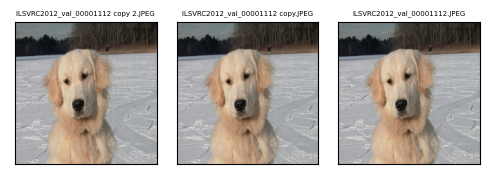

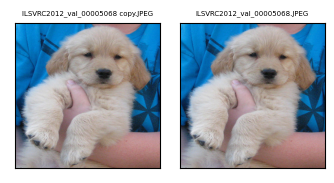

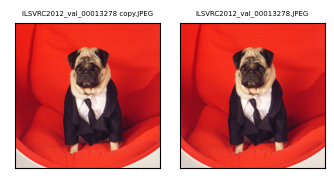

Found 1 sets of images with near_duplicates issue in the dataset.


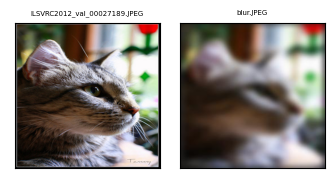

In [9]:
issue_types = {"near_duplicates": {}}

imagelab.find_issues(issue_types)

imagelab.report()

### Save and load Imagelab

Imagelab also has a save and load functionality that you can use to save the results and instance and load them at a later point in time to see results or run more checks

In [10]:
# For saving
save_path = "./results"
imagelab.save(save_path)

Saved Imagelab to folder: ./results
The data path and dataset must be not be changed to maintain consistent state when loading this Imagelab


In [11]:
# For loading
# specify data_path to help Imagelab check for any inconsistencies between dataset paths in the previous and current run
imagelab = Imagelab.load(save_path, dataset_path)

Reading images from /Users/sanjana/cleanlab_home/cleanvision/image_files
Successfully loaded Imagelab


### Check for an issue with a different threshold

You can use the loaded imagelab instance to check for an issue type with a custom hyperparameter. Here is a table of hyperparameters that each issue type supports and their permissible values. 

`threshold`- All images with scores below this threshold will be flagged as an issue

`hash_size` - This controls how much detail about an image we want to keep for getting perceptual hash. Higher sizes imply more detail.

`hash_type` - Type of perceptual hash to use. Currently `whash` and `phash` are the supported hash types. Check [here](https://github.com/JohannesBuchner/imagehash) for more details on these hash types.

|   | Issue Key        | Hyperparameters                                   |
|---|------------------|---------------------------------------------------|
| 1 | light            | threshold (between 0 and 1)                       |
| 2 | dark             | threshold (between 0 and 1)                       |
| 3 | odd_aspect_ratio | threshold (between 0 and 1)                       |
| 4 | exact_duplicates | N/A                                               |
| 5 | near_duplicates  | hash_size (power of 2), hash_types (whash, phash) |
| 6 | blurry           | threshold (between 0 and 1)                       |
| 7 | grayscale        | threshold (between 0 and 1)                       |
| 8 | low_information  | threshold (between 0 and 1)                       |

Checking for dark images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:00<00:00, 622.92it/s]


Top issues in the dataset

|    | issue_type       |   num_images | num_sets   |
|---:|:-----------------|-------------:|:-----------|
|  0 | dark             |           24 | N/A        |
|  1 | exact_duplicates |            7 | 3.0        |
|  2 | near_duplicates  |            2 | 1.0        | 


Top 4 images with dark issue


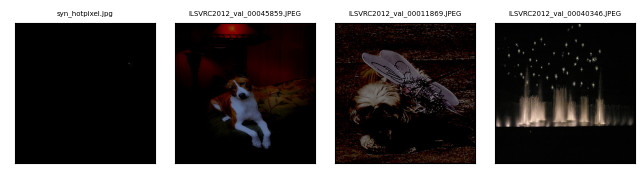

Found 3 sets of images with exact_duplicates issue in the dataset.


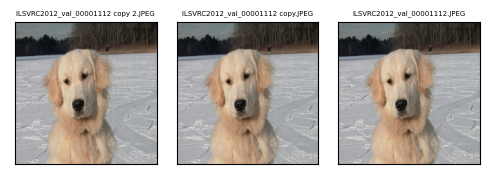

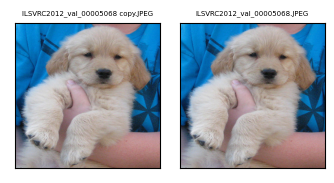

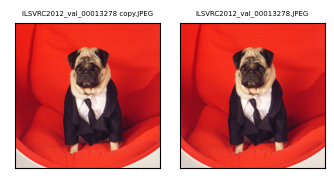

Found 1 sets of images with near_duplicates issue in the dataset.


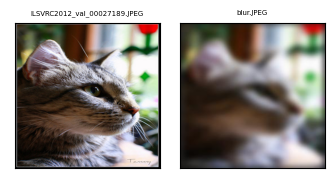

In [12]:
issue_types = {"dark": {"threshold": 0.2}}
imagelab.find_issues(issue_types)

imagelab.report()

Note the number of images with dark issue has reduced from the previous run

### Run imagelab for default issue types, but override hyperparameters for one or more issues

Reading images from /Users/sanjana/cleanlab_home/cleanvision/image_files
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:03<00:00, 141.02it/s]


Checking for near_duplicates images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:01<00:00, 507.44it/s]


|    | issue_type      |   num_images | num_sets   |
|---:|:----------------|-------------:|:-----------|
|  1 | blurry          |           12 | N/A        |
|  5 | near_duplicates |            4 | 2.0        | 

Found 2 sets of images with near_duplicates issue in the dataset.


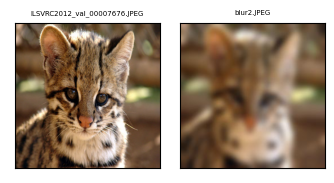

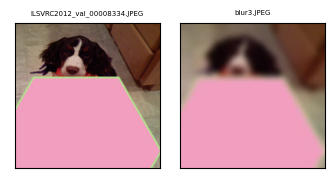


Top 4 images with blurry issue


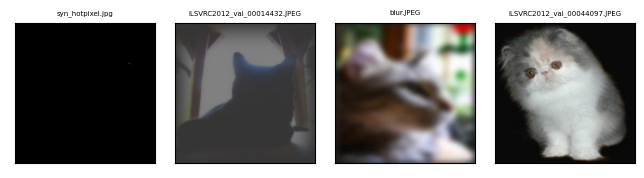

In [13]:
imagelab = Imagelab(dataset_path)

# Check for all default issue types
imagelab.find_issues()

# Specify an issue with custom hyperparameters
issue_types = {"near_duplicates": {"hash_type": "phash"}}

# Run find issues again with specified issue types
imagelab.find_issues(issue_types)


# Pass list of issue_types to imagelab.report() to report only those issue_types
imagelab.report(["near_duplicates", "blurry"])

### Customize report

Report can also be customized in various ways to help with the analysis. For example, you can change the verbosity to return more or less information on issues found, default is `verbosity=1`

Top issues in the dataset

|    | issue_type       |   num_images | num_sets   |
|---:|:-----------------|-------------:|:-----------|
|  0 | dark             |           27 | N/A        |
|  1 | blurry           |           12 | N/A        |
|  2 | grayscale        |           12 | N/A        |
|  3 | exact_duplicates |            7 | 3.0        |
|  4 | light            |            4 | N/A        |
|  5 | near_duplicates  |            4 | 2.0        |
|  6 | odd_aspect_ratio |            3 | N/A        |
|  7 | low_information  |            1 | N/A        | 


Top 16 images with dark issue


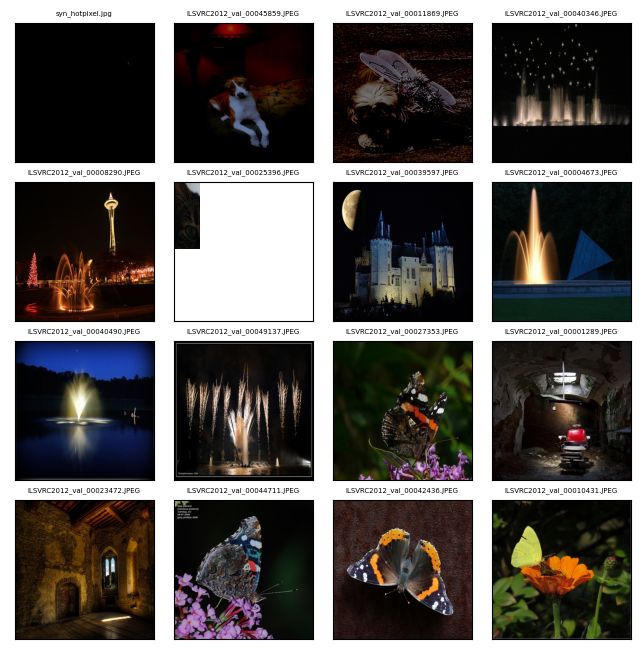

Found 12 examples of blurry issue in the dataset.


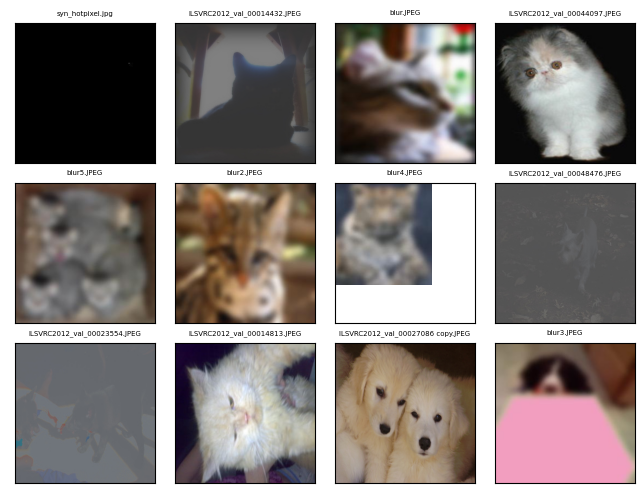

Found 12 examples of grayscale issue in the dataset.


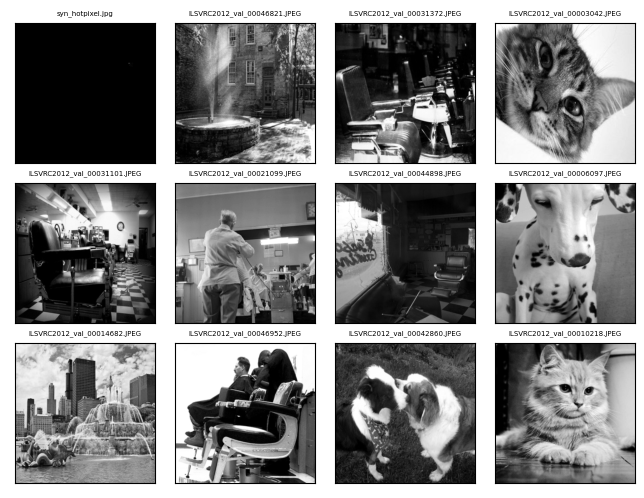

Found 3 sets of images with exact_duplicates issue in the dataset.


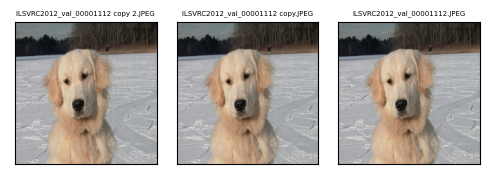

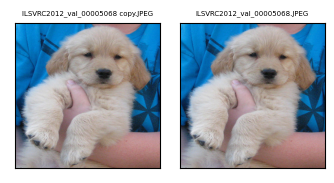

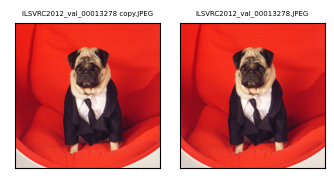

Found 4 examples of light issue in the dataset.


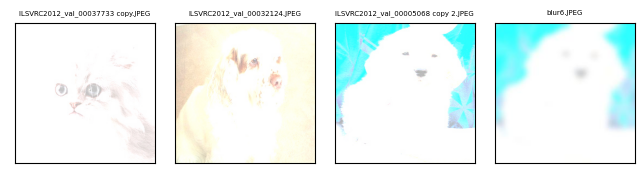

Found 2 sets of images with near_duplicates issue in the dataset.


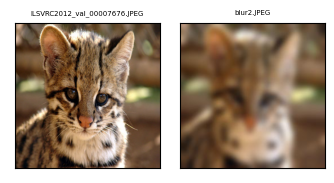

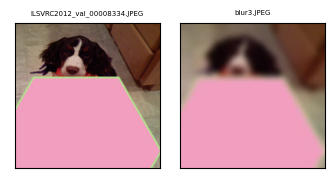

Found 3 examples of odd_aspect_ratio issue in the dataset.


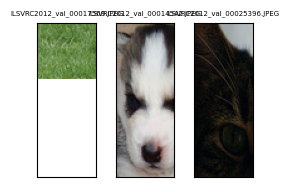

Found 1 examples of low_information issue in the dataset.


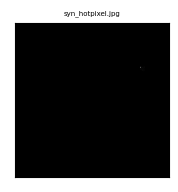

In [14]:
# Change verbosity
imagelab.report(verbosity=3)

You may want to exclude issues from your report which are prevalent in say more than 50% of the dataset and are not real issues but just how the dataset is, for example dark images in an astronomy dataset may not be an issue. You can use the `max_prevalence` parameter in report to exclude such issues. In this example all issues present in more than 5% of the dataset are excluded.

Top issues in the dataset

Removing dark from potential issues in the dataset as it exceeds max_prevalence=0.05 
|    | issue_type       |   num_images | num_sets   |
|---:|:-----------------|-------------:|:-----------|
|  1 | blurry           |           12 | N/A        |
|  2 | grayscale        |           12 | N/A        |
|  3 | exact_duplicates |            7 | 3.0        |
|  4 | light            |            4 | N/A        |
|  5 | near_duplicates  |            4 | 2.0        | 


Top 4 images with blurry issue


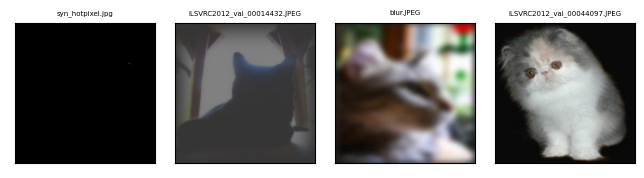


Top 4 images with grayscale issue


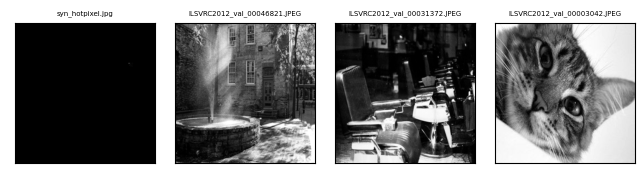

Found 3 sets of images with exact_duplicates issue in the dataset.


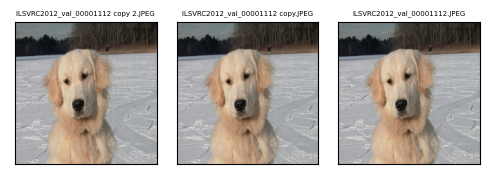

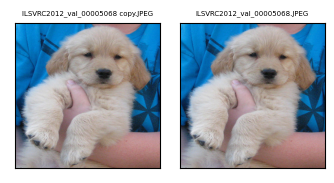

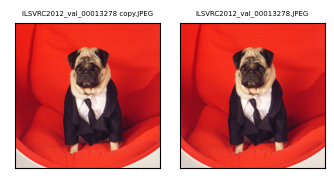


Top 4 images with light issue


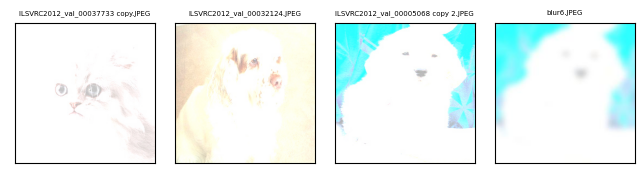

Found 2 sets of images with near_duplicates issue in the dataset.


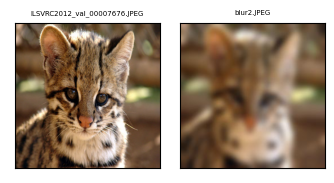

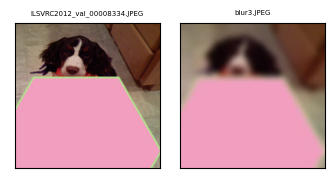

In [15]:
# Report arg values here will overwrite verbosity defaults
# num_top_issues is the number of issues you want to report
imagelab.report(num_top_issues=5, max_prevalence=0.05)

### Visualize specific issues

Imagelab provides `imagelab.visualize` that you can use to see examples of specific issues in your dataset

`examples_per_issue` and `cell_size` are options arguments, that you can use to control number of examples of each issue type and size of image in the image grid respectively.

Found 4 examples of light issue in the dataset.


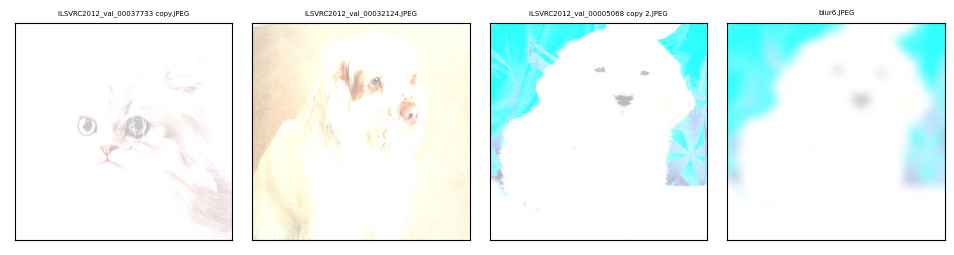

In [16]:
issue_types = ["light"]
imagelab.visualize(issue_types=["light"], examples_per_issue=8, cell_size=(3,3))

## Advanced: Create your own issue type

You can also create a custom issue type by extending a base class of `Imagelab` called `IssueManager`. An example of a custom issue manager can be found in `examples/`

### Run imagelab on custom issue

In [17]:
imagelab = Imagelab(dataset_path)

# Import your issue manager
# This step is important as it will register your issue type alongwith other predefined issue types
import sys
sys.path.append("../examples/")
from custom_issue_manager import CustomIssueManager

issue_name = CustomIssueManager.issue_name


# To ensure your issue manager is registered, check list of possible issue types
# issue_name should be present in this list
imagelab.list_possible_issue_types()

Reading images from /Users/sanjana/cleanlab_home/cleanvision/image_files
All possible issues checked by Imagelab:

near_duplicates
image_property
odd_aspect_ratio
exact_duplicates
duplicate
light
blurry
low_information
custom
grayscale
dark




In [18]:
issue_types = {issue_name: {}}
imagelab.find_issues(issue_types)
imagelab.report()

Checking for custom images ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:00<00:00, 653.55it/s]

Top issues in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | custom       |          182 | 

